In [3]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot as plt

In [4]:
# Read results from logistic regression, random forest, xgboost, and support vector machine models as well as the actual outcomes
lr_train = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/Train_Results_LR.csv")
rf_train = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/Train_Results_RF.csv")
xgb_train = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/Train_Results_XGB.csv")
svm_train = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/Train_Results_SVM.csv")
train = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/insurance_t_var_sel.csv")

lr_val = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/Val_Results_LR.csv")
rf_val = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/Val_Results_RF.csv")
xgb_val = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/Val_Results_XGB.csv")
svm_val = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/Val_Results_SVM.csv")
val = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/insurance_v_var_sel.csv")

# Remove unnecessary columns
lr_train = lr_train.iloc[:,1:]
rf_train = rf_train.iloc[:,1:]
xgb_train = xgb_train.iloc[:,1:]
svm_train = svm_train.iloc[:,1:]

lr_val = lr_val.iloc[:,1:]
rf_val = rf_val.iloc[:,1:]
xgb_val = xgb_val.iloc[:,1:]
svm_val = svm_val.iloc[:,1:]

In [5]:
# Ensure all column names are unique
lr_train = lr_train.add_prefix('lr_')
rf_train = rf_train.add_prefix('rf_')
xgb_train = xgb_train.add_prefix('xgb_')
svm_train = svm_train.add_prefix('svm_')

lr_val = lr_val.add_prefix('lr_')
rf_val = rf_val.add_prefix('rf_')
xgb_val = xgb_val.add_prefix('xgb_')
svm_val = svm_val.add_prefix('svm_')

In [6]:
# Combine all training results to one data frame
train_results = lr_train.join([rf_train, xgb_train, svm_train, train['INS']])

# Combine all validation results to one data frame
val_results = lr_val.join([rf_val, xgb_val, svm_val, val['INS']])

display(train_results)
display(val_results)

,lr_INS_hat,rf_INS_hat,xgb_INS_hat,svm_INS_hat,INS
0,0.266802,0.169618,0.270573,0.252406,0
1,0.383170,0.548340,0.380722,0.293375,1
2,0.193319,0.487821,0.211512,0.224764,1
3,0.056678,0.051203,0.040926,0.163091,0
4,0.133114,0.090675,0.066098,0.342586,0
...,...,...,...,...,...
8490,0.293323,0.156632,0.220222,0.264814,0
8491,0.159250,0.161872,0.232675,0.221875,0
8492,0.685649,0.300947,0.615451,0.663242,0
8493,0.383170,0.547997,0.380722,0.282478,1


,lr_INS_hat,rf_INS_hat,xgb_INS_hat,svm_INS_hat,INS
0,0.593103,0.582504,0.699762,0.579246,1
1,0.600585,0.692401,0.584207,0.843043,1
2,0.247363,0.154176,0.183272,0.308266,0
3,0.340257,0.430390,0.620933,0.271137,0
4,0.409441,0.335489,0.380722,0.320905,0
...,...,...,...,...,...
2119,0.313131,0.410554,0.486962,0.407026,1
2120,0.836258,0.685989,0.712844,0.997192,1
2121,0.492979,0.460989,0.626987,0.515796,1
2122,0.498604,0.587774,0.589570,0.371313,1


# Emsembling Techniques for Binary Classification

* **Simple Average**: Take the average across all predicted probabilities
* **Weighted Average**: Take the average across all predicted probabilities with more (or less) weights given to certain models
* **Rank Average**: Rank all predicted probabilities by columns and then take the average 
* **Weighted Rank Average**: Rank all predicted probabilities by columns and then take the average with more (or less) weights given to certain models

* **NOTE**: If all our models were made with scikit-learn, then we could use VotingClassifier to get a majority vote or soft vote (weighted average predicted probabilities) to predict the class labels

## Training dataset

In [7]:
# Subset the predicted probability columns
probs = train_results.iloc[:,0:4]
probs

,lr_INS_hat,rf_INS_hat,xgb_INS_hat,svm_INS_hat
0,0.266802,0.169618,0.270573,0.252406
1,0.383170,0.548340,0.380722,0.293375
2,0.193319,0.487821,0.211512,0.224764
3,0.056678,0.051203,0.040926,0.163091
4,0.133114,0.090675,0.066098,0.342586
...,...,...,...,...
8490,0.293323,0.156632,0.220222,0.264814
8491,0.159250,0.161872,0.232675,0.221875
8492,0.685649,0.300947,0.615451,0.663242
8493,0.383170,0.547997,0.380722,0.282478


In [8]:
# Print the AUC of each of the models
for col in probs:
    auc = roc_auc_score(train_results['INS'], probs[col])
    print(f"{col.split('_')[0]} has an AUC of {auc}")

# Goal: Get an AUC better than the highest AUC printed with the exception of the random forest model's AUC as it is unreasonably high

lr has an AUC of 0.8021492795178671
rf has an AUC of 0.9916156057085039
xgb has an AUC of 0.8442189741156367
svm has an AUC of 0.7796560041775416


In [9]:
# Simple Average
simple_avg = np.mean(probs, axis = 1)
roc_auc_score(train_results['INS'], simple_avg)

0.9051925912789518

In [129]:
# Weighted Average
weighted_avg = (probs['lr_INS_hat'] + probs['rf_INS_hat'] + probs['xgb_INS_hat'] + probs['svm_INS_hat']) / 4
auc = roc_auc_score(train_results['INS'], weighted_avg)

# Define best coeffecient combination and range of values for i, j, k, and l
best_coef = None
values_range = np.linspace(0.1, 5, 15)  # 15 values from 0 to 5

# Perform search
for i in values_range:
    for j in values_range:
        for k in values_range:
            # Because the random forest AUC is high, its weight will be 0.25
            weighted_avg_temp = (i*probs['lr_INS_hat'] + 0.25*probs['rf_INS_hat'] + j*probs['xgb_INS_hat'] + k*probs['svm_INS_hat']) / (i+j+k+0.25)
            if roc_auc_score(train_results['INS'], weighted_avg_temp) > auc:
                weighted_avg = weighted_avg_temp
                auc = roc_auc_score(train_results['INS'], weighted_avg_temp)
                best_coef = (i, j, k)

print(best_coef)
print(auc)

# For the weight of the random forest model, have tried 1, 0.5, and 0.25
# With all of them, we get (i, j, k) = (0.1, 0.1, 0.1), but since the AUC is still high when weight = 1 or 0.5, we move forward with weight = 0.25

(0.1, 0.1, 0.1)
0.9486796046083229


In [106]:
# Rank Average
rank_avg = np.mean(probs.rank(), axis = 1)
roc_auc_score(train_results['INS'], rank_avg)

0.8767255310198316

In [130]:
# Rank Weighted Average
rank_weighted_avg = (probs['lr_INS_hat'].rank() + probs['rf_INS_hat'].rank() + probs['xgb_INS_hat'].rank() + probs['svm_INS_hat'].rank()) / 4
rank_auc = roc_auc_score(train_results['INS'], rank_weighted_avg)

# Define best coeffecient combination and range of values for i, j, k, and l
rank_best_coef = None
values_range = np.linspace(0.1, 5, 15)  # 15 values from 0 to 5

# Perform search
for i in values_range:
    for j in values_range:
        for k in values_range:
            # Because the random forest AUC is high, its weight will be 0.25
            rank_weighted_avg_temp = (i*probs['lr_INS_hat'].rank() + 0.25*probs['rf_INS_hat'].rank() + j*probs['xgb_INS_hat'].rank() + k*probs['svm_INS_hat'].rank()) / (i+j+k+0.25)
            if roc_auc_score(train_results['INS'], rank_weighted_avg_temp) > rank_auc:
                rank_weighted_avg = rank_weighted_avg_temp
                rank_auc = roc_auc_score(train_results['INS'], rank_weighted_avg_temp)
                rank_best_coef = (i, j, k)

print(rank_best_coef)
print(rank_auc)

# For the weight of the random forest model, have tried 1, 0.5, and 0.25
# With all of them, we get (i, j, k) = (0.1, 0.1, 0.1), but since the AUC is still high when weight = 1 or 0.5, we move forward with weight = 0.25

(0.1, 0.1, 0.1)
0.9167872601204178


##### Given that the weighted average yields the highest AUC, we would move forward with this ensembling technique. However, for exploration purposes, let's see how the other emsembles perform on the validation dataset. First, we visualize the ROC curve using the weighted average.

,TPR,FPR,Cut-off,Youden
704,0.846813,0.112785,0.384743,0.734028
706,0.847156,0.113143,0.384563,0.734012
808,0.872858,0.138964,0.357589,0.733895
806,0.871830,0.138067,0.358679,0.733763
714,0.849554,0.115833,0.381910,0.733722


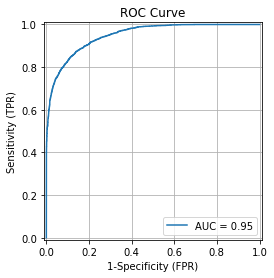

Optimal cutoff is 0.38
Youden's Index (K-S Statistic) is 0.73
Model's AUC is 0.95


In [140]:
# Visualize the ROC curve

# Establish the false positive rate, true positive rate, and the optimal cutoff
fpr, tpr, thresholds = roc_curve(train_results['INS'], (0.1*probs['lr_INS_hat'] + 0.25*probs['rf_INS_hat'] + 0.1*probs['xgb_INS_hat'] + 0.1*probs['svm_INS_hat']) / (0.1+0.25+0.1+0.1))

# Compute Youden's Index
data = {'TPR': tpr, 'FPR': fpr, 'Cut-off': thresholds, 'Youden': tpr-fpr}
youden = pd.DataFrame(data)
youden = youden.sort_values(by = ['Youden'], ascending = False)
display(youden.head(5))

# Plot ROC curve
roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc(fpr, tpr))
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.grid(True)

plt.show()

# Print the optimal cutoff, Youden's index, and AUC
print("Optimal cutoff is", round(youden.loc[704, 'Cut-off'], 2))
print("Youden's Index (K-S Statistic) is", round(youden.loc[704, 'Youden'], 2))
print("Model's AUC is", str(round(auc(fpr, tpr), 2)))

# With an AUC of 0.95, it still seems to be potentially overfitting the training dataset even though we greatly reduced the weight of the random forest model
# Will still need to see how it performs on the validation dataset to be certain

## Validation dataset

In [118]:
# Subset the predicted probability columns
probs_val = val_results.iloc[:,0:4]
probs_val

,lr_INS_hat,rf_INS_hat,xgb_INS_hat,svm_INS_hat
0,0.593103,0.582504,0.699762,0.579246
1,0.600585,0.692401,0.584207,0.843043
2,0.247363,0.154176,0.183272,0.308266
3,0.340257,0.430390,0.620933,0.271137
4,0.409441,0.335489,0.380722,0.320905
...,...,...,...,...
2119,0.313131,0.410554,0.486962,0.407026
2120,0.836258,0.685989,0.712844,0.997192
2121,0.492979,0.460989,0.626987,0.515796
2122,0.498604,0.587774,0.589570,0.371313


In [132]:
# Simple Average
print(roc_auc_score(val_results['INS'], np.mean(probs_val, axis = 1)))

# Weighted Average
print(roc_auc_score(val_results['INS'], (0.1*probs_val['lr_INS_hat'] + 0.25*probs_val['rf_INS_hat'] + 0.1*probs_val['xgb_INS_hat'] + 0.1*probs_val['svm_INS_hat']) / (0.1+0.25+0.1+0.1)))

# Rank Average
print(roc_auc_score(val_results['INS'], np.mean(probs_val.rank(), axis = 1)))

# Rank Weighted Average
print(roc_auc_score(val_results['INS'], (0.1*probs_val['lr_INS_hat'].rank() + 0.25*probs_val['rf_INS_hat'].rank() + 0.1*probs_val['xgb_INS_hat'].rank() + 0.1*probs_val['svm_INS_hat'].rank()) / (0.1+0.25+0.1+0.1)))

0.7988208034763478
0.7991601686684012
0.7994566256177811
0.8000183335218696


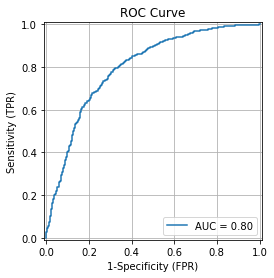

Model's AUC is 0.8


In [135]:
# Visualize the ROC curve

# Establish the false positive rate, true positive rate, and the optimal cutoff
fpr, tpr, thresholds = roc_curve(val_results['INS'], (0.1*probs_val['lr_INS_hat'] + 0.25*probs_val['rf_INS_hat'] + 0.1*probs_val['xgb_INS_hat'] + 0.1*probs_val['svm_INS_hat']) / (0.1+0.25+0.1+0.1))

# Plot ROC curve
roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc(fpr, tpr))
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.grid(True)

plt.show()

# Print the AUC
print("Model's AUC is", str(round(auc(fpr, tpr), 2)))

# This ensemble is the best model so far with an AUC of 0.8 on the validation dataset

In [141]:
# Confusion matrix where we make predictions from predicted probabilities based on the optimal cut-off
val['INS_pred'] = ((0.1*probs_val['lr_INS_hat'] + 0.25*probs_val['rf_INS_hat'] + 0.1*probs_val['xgb_INS_hat'] + 0.1*probs_val['svm_INS_hat']) / (0.1+0.25+0.1+0.1)).map(lambda x: 1 if x > (youden.loc[704, 'Cut-off']) else 0)
pd.crosstab(val['INS'], val['INS_pred'])

# Overall, in terms of being able to discriminate between customers who buy or do not buy the annuity product,
# the weighted average ensemble performs better compared to any individual model!

INS_pred,0,1
INS,,
0,1003,379
1,195,547
